In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [2]:
def per2float(x):
  try: 
    x = float(x.strip('%'))/100
    return x
  except: pass

train_df = pd.read_csv('data/train/KeqingStat_train.csv', converters={'CRIT DMG':per2float})
test_df = pd.read_csv('data/test/KeqingStat_test.csv', converters={'CRIT DMG':per2float})

train_df.head()

,Lv,Base HP,Base ATK,Base DEF,CRIT DMG,CRIT Rate
0,1,1020,25,62,0.500,5%
1,20,2646,65,161,0.500,5%
2,40,5268,130,321,0.500,5%
3,50,6776,167,413,0.596,5%
4,60,8500,209,519,0.692,5%


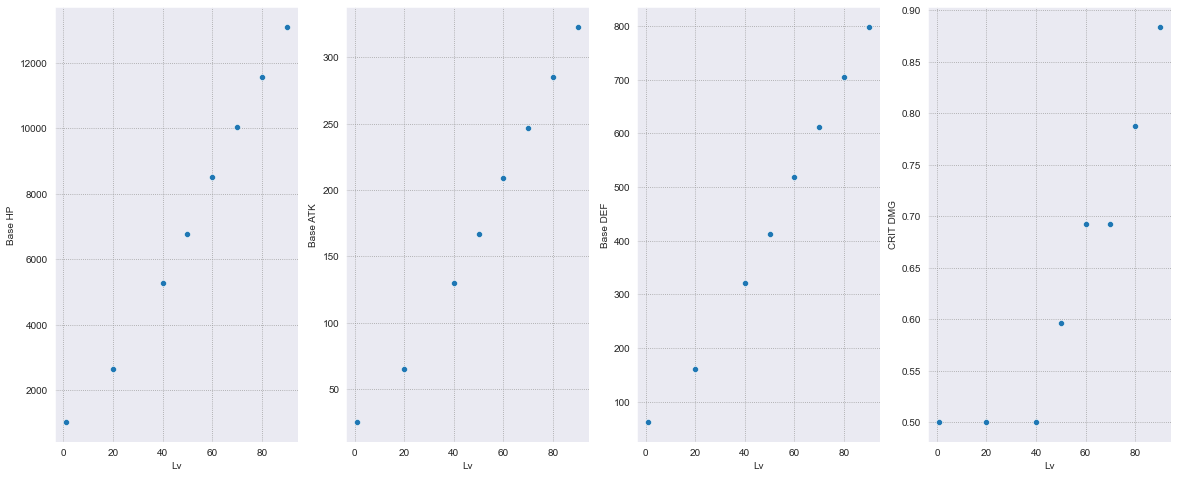

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,8))

sns.scatterplot(x=train_df['Lv'], y=train_df['Base HP'], ax=ax1)
sns.scatterplot(x=train_df['Lv'], y=train_df['Base ATK'], ax=ax2)
sns.scatterplot(x=train_df['Lv'], y=train_df['Base DEF'], ax=ax3)
sns.scatterplot(x=train_df['Lv'], y=train_df['CRIT DMG'], ax=ax4)

plt.show()

In [4]:
in_d = (1,)

def HP_model():
  model = tf.keras.Sequential(name='HP_Model',)
  model.add(tf.keras.layers.Dense(1, input_shape=in_d))
  model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=1))
  return model

def ATK_model():
  model = tf.keras.Sequential(name='ATK_Model')
  model.add(tf.keras.layers.Dense(1, input_shape=in_d))
  model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))
  return model

def DEF_model():
  model = tf.keras.Sequential(name='DEF_Model')
  model.add(tf.keras.layers.Dense(1, input_shape=in_d))
  model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))
  return model

def CRIT_model():
  model = tf.keras.Sequential(name='CRIT_Model')
  model.add(tf.keras.layers.Dense(1, input_shape=in_d))
  model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
  return model

hp_m = HP_model()
atk_m = ATK_model()
def_m = DEF_model()
crit_m = CRIT_model()

In [5]:
X = train_df['Lv']

hp_his = hp_m.fit(X, train_df['Base HP'], epochs=900, verbose=0)
atk_his = atk_m.fit(X, train_df['Base ATK'], epochs=900, verbose=0)
def_his = def_m.fit(X, train_df['Base DEF'], epochs=900, verbose=0)
crit_his = crit_m.fit(X, train_df['CRIT DMG'], epochs=900, verbose=0)

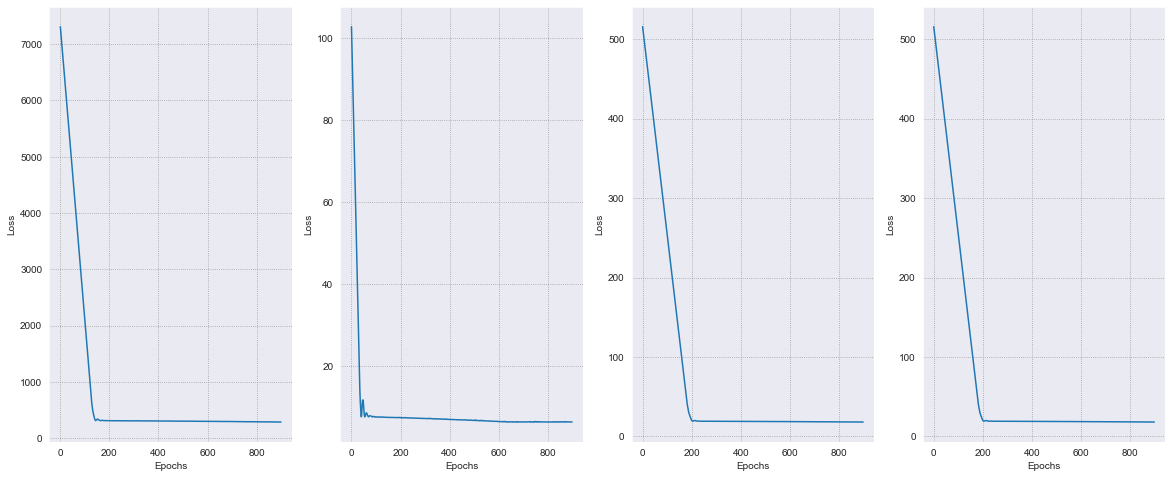

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,8))

ax1.plot(hp_his.history['loss'])
ax2.plot(atk_his.history['loss'])
ax3.plot(def_his.history['loss'])
ax4.plot(def_his.history['loss'])

ax1.set_xlabel('Epochs'), ax2.set_xlabel('Epochs'), ax3.set_xlabel('Epochs'), ax4.set_xlabel('Epochs')
ax1.set_ylabel('Loss'), ax2.set_ylabel('Loss'), ax3.set_ylabel('Loss'), ax4.set_ylabel('Loss')

plt.show()

In [7]:
result = {}

result['hp_prediction'] = hp_m.predict(test_df['Lv'])
result['atk_prediction'] = atk_m.predict(test_df['Lv'])
result['def_prediction'] = def_m.predict(test_df['Lv'])
result['crit_prediction'] = crit_m.predict(test_df['Lv'])

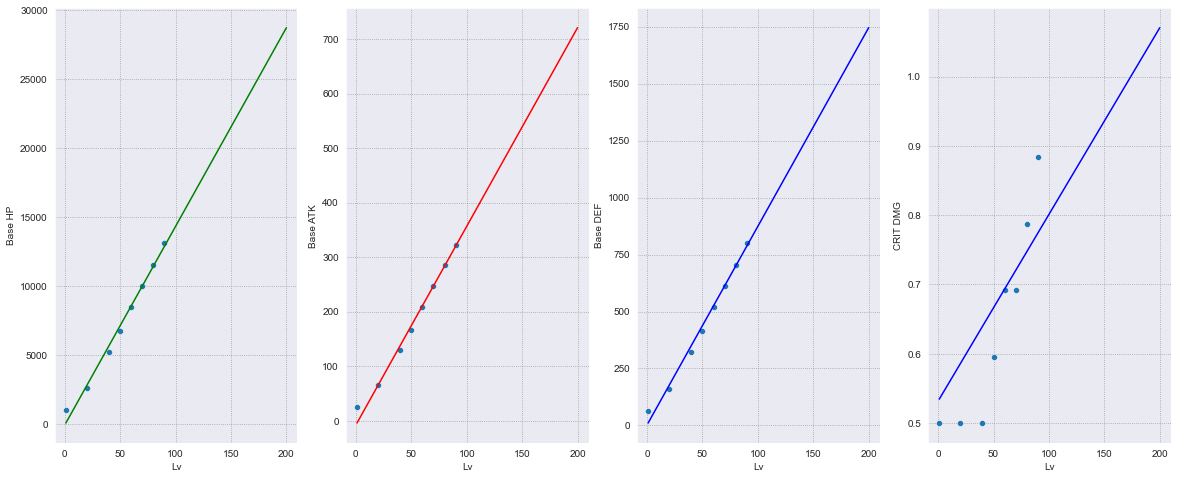

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,8))

sns.scatterplot(x=test_df['Lv'], y=test_df['Base HP'], ax=ax1)
ax1.plot(test_df['Lv'], result['hp_prediction'], color='g')

sns.scatterplot(x=test_df['Lv'], y=test_df['Base ATK'], ax=ax2)
ax2.plot(test_df['Lv'], result['atk_prediction'], color='r')

sns.scatterplot(x=test_df['Lv'], y=test_df['Base DEF'], ax=ax3)
ax3.plot(test_df['Lv'], result['def_prediction'], color='b')

sns.scatterplot(x=test_df['Lv'], y=test_df['CRIT DMG'], ax=ax4)
ax4.plot(test_df['Lv'], result['crit_prediction'], color='b')

plt.show()

In [9]:
HP = np.hstack(result['hp_prediction']).astype(int)
ATK = np.hstack(result['atk_prediction']).astype(int)
DEF = np.hstack(result['def_prediction']).astype(int)
conv_crit = pd.DataFrame(result['crit_prediction']).applymap(lambda x: '{:.2%}'.format(x)).values
CRIT = np.hstack(conv_crit).astype(str)

data = {'Lv': test_df['Lv'], 'Base HP': HP, 'Base ATK': ATK, 'Base DEF': DEF, 'CRIT DMG': CRIT}

result_df = pd.DataFrame(data, columns= ['Lv', 'Base HP', 'Base ATK', 'Base DEF', 'CRIT DMG'])
result_df.to_csv('dist/prediction.csv')

result_df

,Lv,Base HP,Base ATK,Base DEF,CRIT DMG
0,1,88,-4,10,53.44%
1,20,2825,64,176,58.56%
2,40,5705,137,350,63.95%
3,50,7145,174,437,66.65%
4,60,8585,210,524,69.34%
5,70,10025,247,612,72.04%
6,80,11465,283,699,74.73%
7,90,12905,320,786,77.43%
8,100,14345,356,873,80.12%
9,110,15785,393,960,82.81%
